<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday05072022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install basemap
!pip install geopy

import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import numpy as np
import matplotlib.animation as animation
from matplotlib.colors import LogNorm
from matplotlib import font_manager as fm
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
from matplotlib.lines import Line2D


!pip install colour
import colour
from matplotlib.colors import ListedColormap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 863 kB 22.4 MB/s 
     |████████████████████████████████| 6.3 MB 39.4 MB/s 
     |████████████████████████████████| 219 kB 48.3 MB/s 
     |████████████████████████████████| 30.5 MB 2.2 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=2ac4a6e427fb16ba8fdb824a557dcbd53a68d1ed6b73e70e436593d95c93dd09
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Palette
!wget 'https://github.com/BlakeRMills/MetBrewer/raw/main/Python/met_brewer/palettes.py'
import palettes as met

--2022-07-06 16:05:44--  https://github.com/BlakeRMills/MetBrewer/raw/main/Python/met_brewer/palettes.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BlakeRMills/MetBrewer/main/Python/met_brewer/palettes.py [following]
--2022-07-06 16:05:44--  https://raw.githubusercontent.com/BlakeRMills/MetBrewer/main/Python/met_brewer/palettes.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11849 (12K) [text/plain]
Saving to: ‘palettes.py’

palettes.py         100%[===================>]  11.57K  --.-KB/s    in 0s      

2022-07-06 16:05:44 (65.4 MB/s) - ‘palettes.py’ saved [11849/11849]



In [3]:
# Font control
!wget 'https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc'
font_files = fm.findSystemFonts('.')
# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    print(font_file)

# Use your new font on all your plots.
plt.rc('font', family='Avenir')

--2022-07-06 16:05:47--  https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc [following]
--2022-07-06 16:05:48--  https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1639536 (1.6M) [application/octet-stream]
Saving to: ‘Avenir.ttc’

Avenir.ttc          100%[===================>]   1.56M  --.-KB/s    in 0.01s   

2022-07-06 16:05:48 (153 MB/s) - ‘Avenir.ttc’ saved [1639536/1639536]

/content/Avenir.ttc


In [35]:
# Data

df = pd.read_csv('https://github.com/rfordatascience/tidytuesday\
/blob/master/data/2022/2022-07-05/rent.csv?raw=true')

# Filtering
#df = df[(df['beds'] == 1)]  # Only consider one-bed apts
df = df.dropna(axis=0)
df = df.sort_values('price')
df = df[3:-3]  # Remove extremes

df = df.reset_index(drop=True)

In [13]:
# Viewer
df

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,4710909355,20141012,2014,napa county,napa county,napa,850,1.0,1.0,725.0,0,236,38.112274,-122.264078,Nice Apartment in Marina-Vallejo/ Walk to The ...,"Nancy | show contact info, 142 Wilson Ave, Va...","1BR / 1Ba 725ft2 apartment date=""2015-10-10"" ..."
1,4710910372,20141012,2014,vallejo / benicia,vallejo,solano,850,1.0,1.0,725.0,0,647,38.112190,-122.263200,Apt. in Marina-Walk to Ferry boat to SF,"Come Home to the Bay View Apartments... Apt, w...","1BR / 1Ba 725ft2 apartment date=""2015-10-10"" ..."
2,5942857886,20170105,2017,santa clara,santa clara,santa clara,890,1.0,1.0,117.0,0,2589,37.428030,-121.970300,Clean room in gorgeous new house,This room is for one person only. No couple or...,"1BR / sharedBa117ft2 data-date=""2017-01-23"" da..."
3,4695508547,20141005,2014,richmond / point / annex,richmond,contra costa,895,1.0,1.0,500.0,0,473,37.930124,-122.344681,1 Bedroom Apt in Richmond -located close to Bart,"With the high rent in San Francisco, why move ...","1BR / 1Ba 500ft2 apartment date=""2014-10-10"" ..."
4,4645253583,20140831,2014,vallejo / benicia,vallejo,solano,900,3.0,2.0,1735.0,0,1133,38.098500,-122.212400,Lovely three bedroom/two bath home on corner l...,Lovely three bedroom/two bath home on corner l...,"3BR / 2Ba 1735ft2 house date=""2014-08-30"" tod..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,4600628723,20140803,2014,marina / cow hollow,san francisco,san francisco,14500,4.0,1.0,3045.0,0,1393,37.804676,-122.441139,Grand Marina Residence,Contact info:Andrew Paolucci | 7x7 Properties ...,"4BR / 3.5Ba 3045ft2 house date=""2014-08-04"" t..."
1524,4962242019,20150414,2015,palo alto,palo alto,santa clara,15000,0.0,3.0,1962.0,0,2091,37.444300,-122.149700,Exceptional Luxury Living in the heart of Palo...,"The Marc, Palo Alto Call Now: show contact in...","3BR / 3Ba 1962ft2 apartment date=""2015-04-13""..."
1525,5269337867,20151029,2015,palo alto,palo alto,santa clara,16500,5.0,4.5,3750.0,0,2303,37.439239,-122.141975,"Elegant 5 BD, 4.5 BA Gem in heart of Old Palo ...",Stunning Architectural Gem in Heart of Old Pal...,"5BR / 4.5Ba 3750ft2 date=""2015-06-01"" today_m..."
1526,4817245378,20141223,2014,lower pac hts,san francisco,san francisco,17500,6.0,1.0,6194.0,0,833,37.787533,-122.436935,"Historic, Victorian Mansion in Lower Pac Heigh...",No Fee BrokersSan Francisco - Lower Pacific He...,"6BR / 4Ba 6194ft2 house date=""2015-12-22"" tod..."


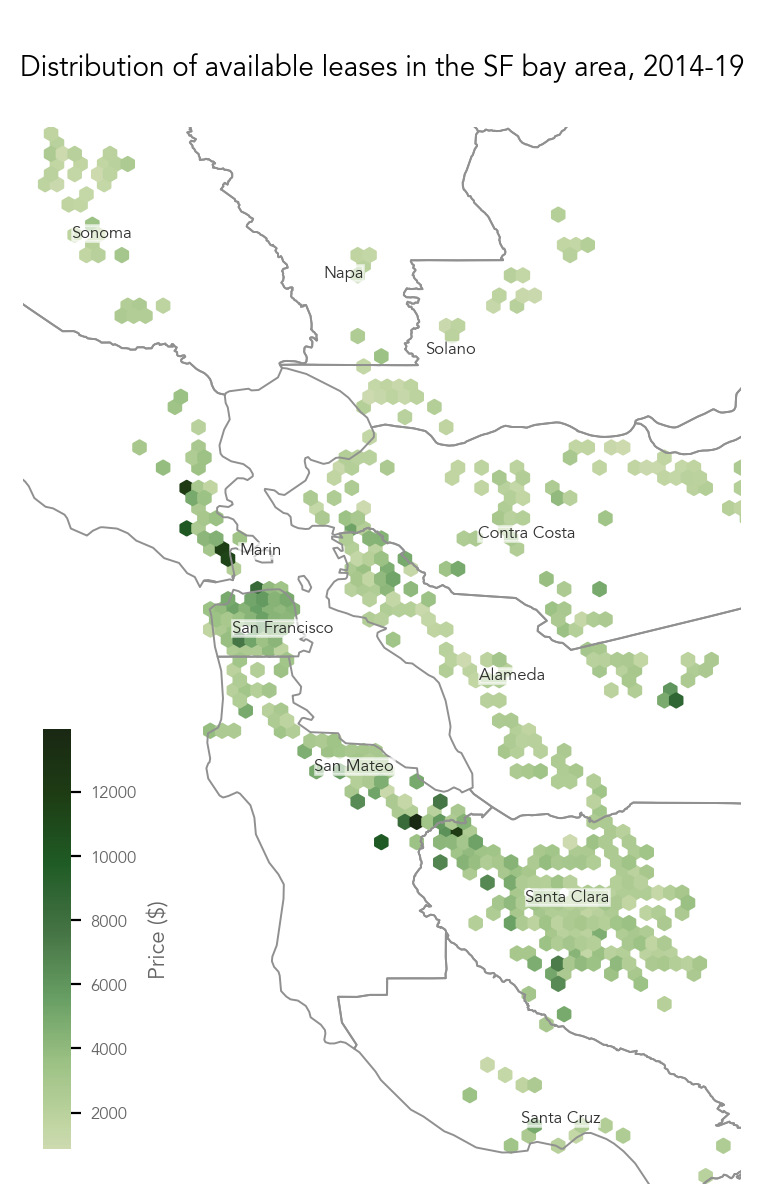

In [46]:
# Draw a static image first

fig, ax = plt.subplots(figsize=(7,7), dpi=200, 
           facecolor='w',
           #frameon=False
           )
plt.axis('off')


# Draw map
m = Basemap(llcrnrlon=-122.8, llcrnrlat=36.9, 
            urcrnrlon=-121.7, urcrnrlat=38.52,
            #lat_1=30, lon_0=-30,
            projection='cyl',
            #area_thresh=10000,
            #fix_aspect=False,
            ax=ax)
m.drawmapboundary(fill_color='w',#ffe8ae', 
                  linewidth=0)
'''m.fillcontinents(color='#000000', 
                 zorder=1,
                 alpha=0.1)

m.drawcountries(linewidth=.9, 
                linestyle='--', 
                color='w',#'#a0a0a0',
                zorder=10)'''

m.drawcounties(linewidth=.7, 
                linestyle='-', 
                color='#909090',
                zorder=10, 
               )
#m.bluemarble(ax=ax)

'''m.drawcoastlines(linewidth=0.9,
                 linestyle='--',
                 color='#a0a0a0',
                 zorder=10
                 )'''



# Cmap
colors = met.met_brew(name="VanGogh3", 
                      n=200, 
                      brew_type="continuous") #cmap

colors_r = colors[::-1]  # Reverse cmap

cmap = ListedColormap(sns.color_palette(colors[20:]).as_hex())


# Plot data
im = m.hexbin(df.lon, df.lat, 
         C=df['price'],
         #gridsize=500,
         gridsize=(100, 55), 
         cmap=cmap,#plt.cm.bone_r,
         zorder=2,
         alpha=1)

# Annotations
title = plt.title('\nDistribution of available\
 leases in the SF bay area, 2014-19\n',
                  size=10,)

labeldf = df.groupby('county').mean()
for row in labeldf.itertuples():
  loc = m(row[-1], row[-2])
  t = plt.text(loc[0], loc[1], 
           row[0].title(),
           alpha=0.8, size=6,
           ha='center',
           va='center',
           zorder=12)
  t.set_bbox(dict(facecolor='w', 
                  alpha=0.6, 
                  edgecolor=(1,1,1,0),
                  pad=-0.16,
                  ))



# Cbar

cbar_ax = fig.add_axes([0.27, 0.15, 0.02, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax,
             spacing='proportional',
             drawedges=False,
             )
cbar.solids.set_alpha(1)
cbar.outline.set_visible(False)
cbar.set_label('Price ($)',
               size=8,
               alpha=0.6)
for label in cbar.ax.get_yticklabels():
  label.set(alpha=0.6,
            size=6,
            fontfamily='Avenir')

plt.show()

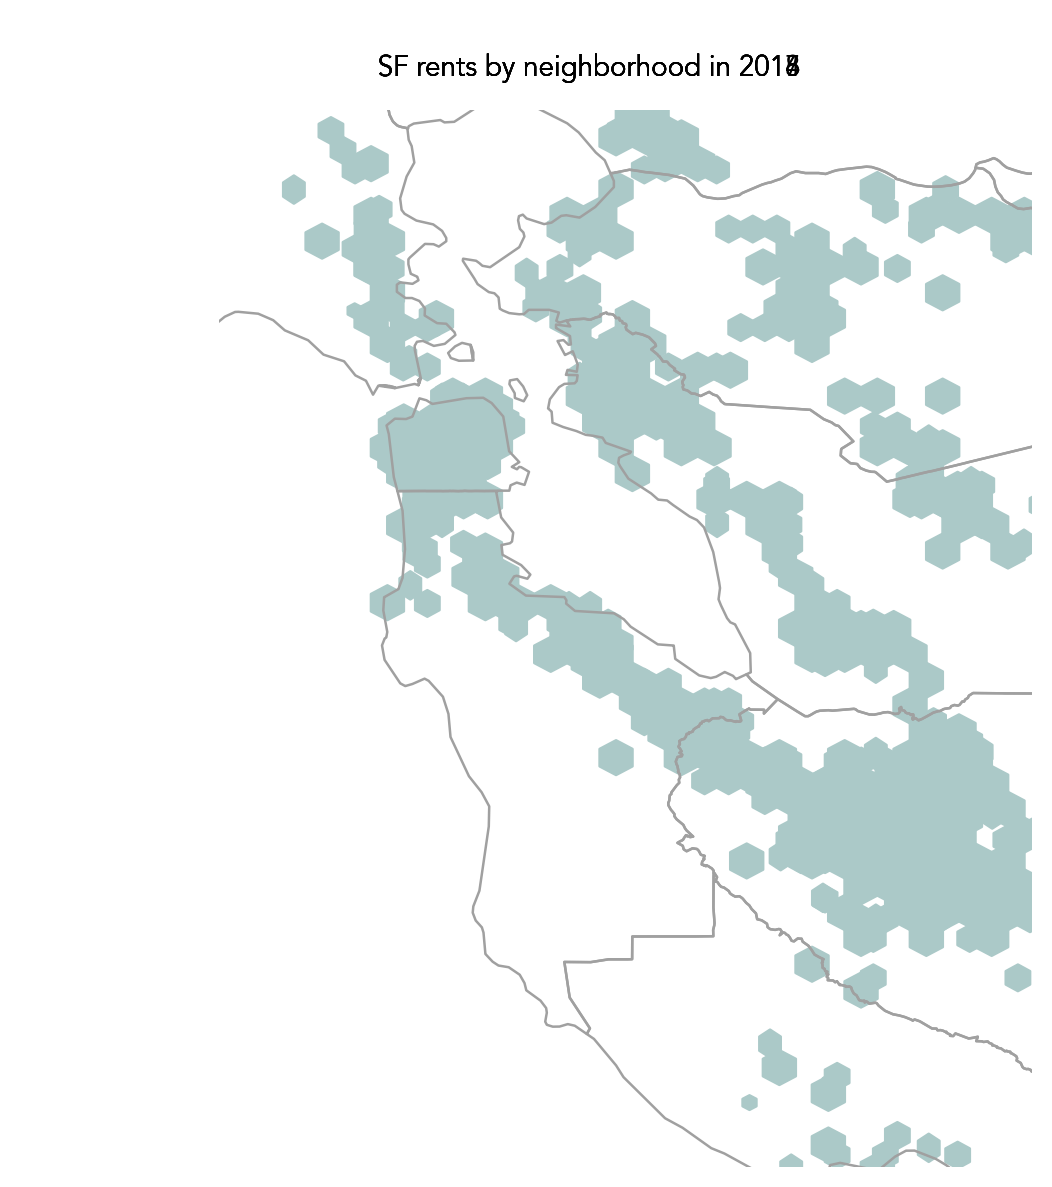

In [40]:
# Animated (A failed attempt rip)
fig, ax = plt.subplots(figsize=(7,7), dpi=200, 
           facecolor='w',
           #frameon=False
           )
plt.axis('off')


# Draw map
m = Basemap(llcrnrlon=-122.7, llcrnrlat=36.96, 
            urcrnrlon=-121.8, urcrnrlat=38.13,
            #lat_1=30, lon_0=-30,
            projection='cyl',
            #area_thresh=10000,
            #fix_aspect=False,
            ax=ax)

m.drawmapboundary(fill_color='w',#ffe8ae', 
                  linewidth=0)

m.drawcounties(linewidth=.9, 
                linestyle='-', 
                color='#a0a0a0',
                zorder=10, 
               )

# Cmap
colors = met.met_brew(name="Hokusai2", 
                      n=200, 
                      brew_type="continuous") #cmap

colors_r = colors[::-1]  # Reverse cmap

cmap = ListedColormap(sns.color_palette(colors[:]).as_hex())

  
# Title
title_ax = fig.add_axes([0.08, 0.85, 0.5, 0.03])
plt.axis('off')


# Plot data

def init():
  im = m.hexbin(df.lon, df.lat, 
         C=df['price'],
         gridsize=(50,37), 
         cmap=cmap,#plt.cm.bone_r,
         zorder=2,
         alpha=0)
  title = title_ax.text(0.5, 1,
                   f'',
                   size=10,)
  return im, title

def animate(frame):
  ydf = df[df.year == frame]
  im = m.hexbin(ydf.lon, ydf.lat, 
         C=np.zeros(len(ydf.lon)),
         gridsize=(50,37), 
         cmap=cmap,#plt.cm.bone_r,
         zorder=2,
         alpha=1)
  title = title_ax.text(0.5, 1,
                   f'\n SF rents by neighborhood in {frame}\n',
                   size=10,)
  return im, title

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(df.year.min(), 
                                            df.year.max() + 1), 
                               interval=1200, 
                               blit=True,
                               )


# Cbar
'''
cbar_ax = fig.add_axes([0.25, 0.15, 0.02, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax,
             spacing='proportional',
             drawedges=False,
             )
cbar.solids.set_alpha(1)
cbar.outline.set_visible(False)
cbar.set_label('Price ($)',
               size=8,
               alpha=0.6)
for label in cbar.ax.get_yticklabels():
  label.set(alpha=0.6,
            size=6,
            fontfamily='Avenir')
'''
  

anim.save('SF_rent.mp4', fps=1)

plt.show()

# It's now working lmao but I reckon that I need to go to bed
# so let's call it a day and I'll try next week